## Load jpg image file using tensorflow

#### Typical setup to include TensorFlow.

In [1]:
import tensorflow as tf

#### Make a queue of file names including all the JPEG images files in the relative image directory.

In [2]:
filename_queue = tf.train.string_input_producer(
    tf.train.match_filenames_once("./data/0/*.jpg"))

#### Read an entire image file which is required since they're JPEGs, if the images are too large they could be split in advance to smaller files or use the Fixed reader to split up the file.

In [3]:
image_reader = tf.WholeFileReader()

#### Read a whole file from the queue, the first returned value in the tuple is the filename which we are ignoring.

In [4]:
_, image_file = image_reader.read(filename_queue)

#### Decode the image as a JPEG file, this will turn it into a Tensor which we can then use in training.
 - resizing + gray scaling and set shape

In [5]:
image_orig = tf.image.decode_jpeg(image_file)
image_resized = tf.image.resize_images(image_orig, [224, 224])
image = tf.image.rgb_to_grayscale(image_resized)
image.set_shape((224, 224, 1))

#### set batch size, number of preprocess threads, minimum queue examples and use shuffle batch function in tf.train module

In [6]:
batch_size = 4
num_preprocess_threads = 1
min_queue_examples = 16
images = tf.train.shuffle_batch(
    [image],
    batch_size=batch_size,
    num_threads=num_preprocess_threads,
    capacity=min_queue_examples + 3 * batch_size,
    min_after_dequeue=min_queue_examples)

#### Start a new session to show example output.

In [7]:
# Start a new session to show example output.
with tf.Session() as sess:
    # Required to get the filename matching to run.
    sess.run(tf.local_variables_initializer())

    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    # Get an image tensor and print its value.
    image_tensor = sess.run(images)
    print(image_tensor.shape)

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)

(4, 224, 224, 1)


#### Let's see image data

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

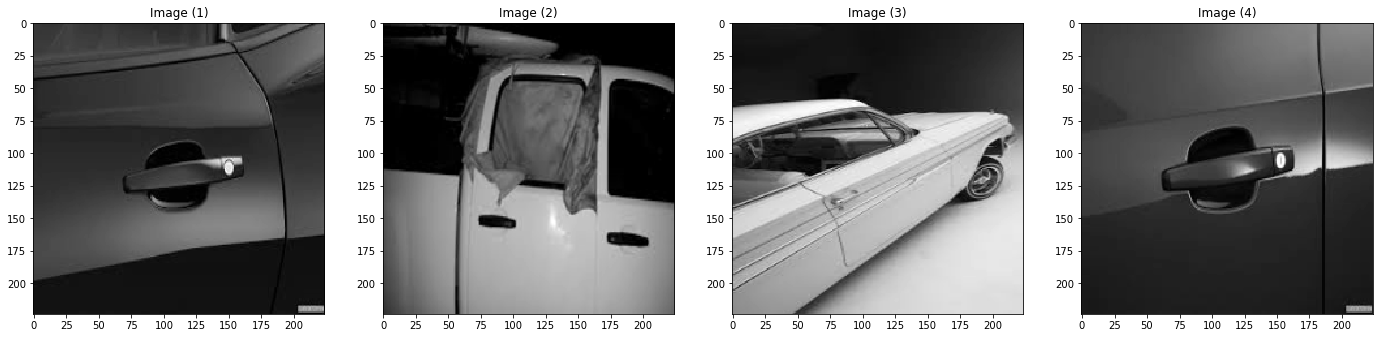

In [10]:
show_images(image_tensor[...,0])